In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from alpha_vantage.timeseries import TimeSeries

In [3]:
API_key = '7B77DN42UJ2P4TF2'
ts =TimeSeries(key =API_key,output_format ="pandas")
AAPL =ts.get_intraday("AAPL",interval='5min')
aapl=AAPL[0]
aapl

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-02-14 20:00:00,152.79,152.850,152.76,152.84,9429.0
2023-02-14 19:55:00,152.75,152.770,152.73,152.77,3596.0
2023-02-14 19:50:00,152.75,152.760,152.70,152.71,4770.0
2023-02-14 19:45:00,152.84,152.870,152.75,152.76,7379.0
2023-02-14 19:40:00,152.87,152.870,152.84,152.84,1795.0
...,...,...,...,...,...
2023-02-14 12:00:00,151.56,151.830,151.36,151.70,518882.0
2023-02-14 11:55:00,151.53,151.600,151.17,151.55,496456.0
2023-02-14 11:50:00,151.13,151.720,151.10,151.54,494145.0


In [4]:
API_key = '7B77DN42UJ2P4TF2'
ts =TimeSeries(key =API_key,output_format ="pandas")
GOOGL =ts.get_intraday("GOOGL",interval='5min')
googl =GOOGL[0]
googl

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-02-14 20:00:00,94.180,94.1800,94.110,94.1200,9174.0
2023-02-14 19:55:00,94.230,94.2300,94.180,94.1800,2882.0
2023-02-14 19:50:00,94.240,94.2400,93.500,93.5000,15924.0
2023-02-14 19:45:00,94.260,94.2899,94.200,94.2000,5486.0
2023-02-14 19:40:00,94.260,94.3200,94.250,94.3200,5043.0
...,...,...,...,...,...
2023-02-14 12:00:00,92.460,92.7300,92.450,92.6607,368689.0
2023-02-14 11:55:00,92.550,92.5700,92.270,92.4679,385199.0
2023-02-14 11:50:00,92.330,92.6300,92.305,92.5500,683503.0


# firstly analyse the aapl data

In [5]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-02-14 20:00:00 to 2023-02-14 11:40:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [6]:
aapl.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-02-14 20:00:00,152.79,152.85,152.76,152.84,9429.0
2023-02-14 19:55:00,152.75,152.77,152.73,152.77,3596.0
2023-02-14 19:50:00,152.75,152.76,152.70,152.71,4770.0
2023-02-14 19:45:00,152.84,152.87,152.75,152.76,7379.0
2023-02-14 19:40:00,152.87,152.87,152.84,152.84,1795.0


In [7]:
columns =['open','high','low','close','volume']
aapl.columns =columns

In [8]:
aapl['volume'] =aapl["volume"].astype(np.int64)

In [9]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-02-14 20:00:00 to 2023-02-14 11:40:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


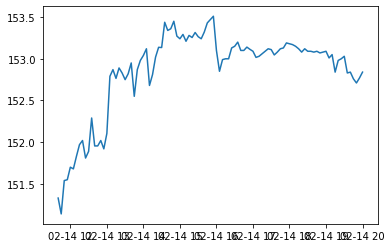

In [10]:
plt.plot(aapl['close'])

In [11]:
aapl['tradedate'] = aapl.index.date
aapl['time']= aapl.index.time

In [12]:
aapl.loc["2023-02-13"]

,open,high,low,close,volume,tradedate,time
date,,,,,,,


In [13]:
aapl.groupby('tradedate').agg({"low":min,"high":max})

,low,high
tradedate,,
2023-02-14,151.04,153.73


In [14]:
aapl.loc[aapl.groupby("tradedate")['low'].idxmin()]

,open,high,low,close,volume,tradedate,time
date,,,,,,,
2023-02-14 11:45:00,151.35,151.386,151.04,151.14,490943,2023-02-14,11:45:00


In [15]:
aapl.loc[aapl.groupby("tradedate")['high'].idxmax()]

,open,high,low,close,volume,tradedate,time
date,,,,,,,
2023-02-14 16:00:00,153.52,153.73,153.08,153.1,2400160,2023-02-14,16:00:00


# than analysed googl data

In [16]:
googl.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-02-14 20:00:00,94.18,94.1800,94.11,94.12,9174.0
2023-02-14 19:55:00,94.23,94.2300,94.18,94.18,2882.0
2023-02-14 19:50:00,94.24,94.2400,93.50,93.50,15924.0
2023-02-14 19:45:00,94.26,94.2899,94.20,94.20,5486.0
2023-02-14 19:40:00,94.26,94.3200,94.25,94.32,5043.0


In [17]:
columns =['open','high','low','close','volume']
googl.columns =columns

In [18]:
aapl['volume'] =aapl["volume"].astype(np.int64)

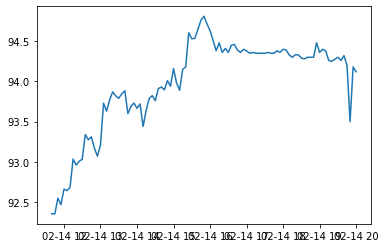

In [19]:
plt.plot(googl['close'])

In [20]:
googl['tradedate'] = googl.index.date
googl['time']= googl.index.time

In [21]:
googl.head()

,open,high,low,close,volume,tradedate,time
date,,,,,,,
2023-02-14 20:00:00,94.18,94.1800,94.11,94.12,9174.0,2023-02-14,20:00:00
2023-02-14 19:55:00,94.23,94.2300,94.18,94.18,2882.0,2023-02-14,19:55:00
2023-02-14 19:50:00,94.24,94.2400,93.50,93.50,15924.0,2023-02-14,19:50:00
2023-02-14 19:45:00,94.26,94.2899,94.20,94.20,5486.0,2023-02-14,19:45:00
2023-02-14 19:40:00,94.26,94.3200,94.25,94.32,5043.0,2023-02-14,19:40:00


In [22]:
googl.groupby('tradedate').agg({"low":min,"high":max})

,low,high
tradedate,,
2023-02-14,92.26,94.845


In [23]:
googl.loc[googl.groupby("tradedate")['low'].idxmin()]

,open,high,low,close,volume,tradedate,time
date,,,,,,,
2023-02-14 11:45:00,92.36,92.455,92.26,92.3531,604495.0,2023-02-14,11:45:00


In [24]:
googl.loc[googl.groupby("tradedate")['high'].idxmax()]

,open,high,low,close,volume,tradedate,time
date,,,,,,,
2023-02-14 16:00:00,94.72,94.845,94.62,94.63,1911120.0,2023-02-14,16:00:00


In [25]:
from matplotlib import rcParams

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


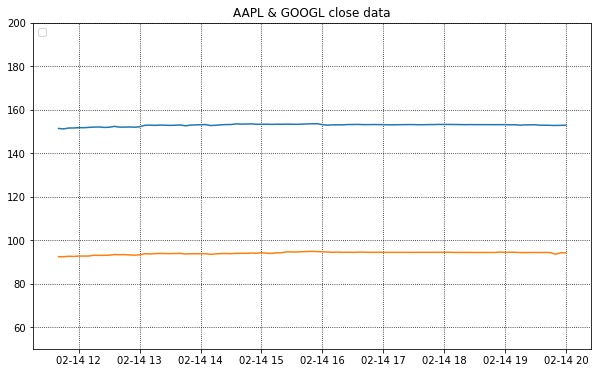

In [26]:
rcParams['figure.figsize'] =10,6
plt.plot(aapl['close'])
plt.plot(googl['close'])
plt.grid(True,color ="k",linestyle=":")
plt.title("AAPL & GOOGL close data")
plt.ylim(50,200)
plt.legend(loc =2);

In [27]:
from talib import abstract


In [28]:
indicator=abstract.AROONOSC(aapl,timeperiod =5)
indicator

date
2023-02-14 20:00:00      NaN
2023-02-14 19:55:00      NaN
2023-02-14 19:50:00      NaN
2023-02-14 19:45:00      NaN
2023-02-14 19:40:00      NaN
                       ...  
2023-02-14 12:00:00   -100.0
2023-02-14 11:55:00    -80.0
2023-02-14 11:50:00   -100.0
2023-02-14 11:45:00    -80.0
2023-02-14 11:40:00     20.0
Length: 100, dtype: float64

In [29]:
indicator_1=abstract.AROONOSC(googl,timeperiod =5)
indicator_1

date
2023-02-14 20:00:00      NaN
2023-02-14 19:55:00      NaN
2023-02-14 19:50:00      NaN
2023-02-14 19:45:00      NaN
2023-02-14 19:40:00      NaN
                       ...  
2023-02-14 12:00:00    -80.0
2023-02-14 11:55:00   -100.0
2023-02-14 11:50:00    -80.0
2023-02-14 11:45:00    -80.0
2023-02-14 11:40:00    -80.0
Length: 100, dtype: float64

# visualize the data in candlestick form

In [30]:
from plotly.offline import plot
import plotly.graph_objs as go

In [31]:
o = aapl['open'].astype(float)
h = aapl['high'].astype(float)
l = aapl['low'].astype(float)
c = aapl['close'].astype(float)

trace = go.Candlestick(
            open=o,
            high=h,
            low=l,
            close=c)
data = [trace]

plot(data, filename='go_candle1.html')

'go_candle1.html'

In [32]:
o = googl['open'].astype(float)
h = googl['high'].astype(float)
l = googl['low'].astype(float)
c = googl['close'].astype(float)

trace = go.Candlestick(
            open=o,
            high=h,
            low=l,
            close=c)
data = [trace]

plot(data, filename='go_candle1.html')

'go_candle1.html'